In [23]:
#CNN - Convolution Neural Network Project - Image Classification - Son Vs Not Son Images [Dilip- Batch-DSTI-A19]

In [ ]:
import os, shutil

In [24]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'C:\\DCHAVAN\\DSTI-Masters\\DilipPersonalStudy\\DeepLearning\\ImageReco_Face\\ANN_Modeling\\Son_Vs_NotSon_Images'
#C:\DCHAVAN\DSTI-Masters\DilipPersonalStudy\DeepLearning\Dog&Cat\train

In [25]:
# The directory where we will
# store our smaller dataset
base_dir = 'C:\\DCHAVAN\\DSTI-Masters\\DilipPersonalStudy\\DeepLearning\\ImageReco_Face\\ANN_Modeling\\son_vs_notson_data'
os.mkdir(base_dir)

In [26]:
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [27]:
# Directory with our training son pictures
train_son_dir = os.path.join(train_dir, 'son')
os.mkdir(train_son_dir)
# Directory with our training notson pictures
train_notson_dir = os.path.join(train_dir, 'notson')
os.mkdir(train_notson_dir)

In [28]:
# Directory with our validation son pictures
validation_son_dir = os.path.join(validation_dir, 'son')
os.mkdir(validation_son_dir)

# Directory with our validation notson pictures
validation_notson_dir = os.path.join(validation_dir, 'notson')
os.mkdir(validation_notson_dir)

In [29]:
# Directory with our validation son pictures
test_son_dir = os.path.join(test_dir, 'son')
os.mkdir(test_son_dir)

# Directory with our validation notson pictures
test_notson_dir = os.path.join(test_dir, 'notson')
os.mkdir(test_notson_dir)

In [30]:
# Copy first 1000 son images to train_son_dir
fnames = ['Son-Dipen.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_son_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 250 son images to validation_son_dir
fnames = ['Son-Dipen.{}.jpg'.format(i) for i in range(1000, 1250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_son_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 250 cat images to test_son_dir
fnames = ['Son-Dipen.{}.jpg'.format(i) for i in range(1250, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_son_dir, fname)
    shutil.copyfile(src, dst)

In [31]:
# Copy first 1000 notson images to train_notson_dir
fnames = ['Not-Son.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_notson_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 250 notson images to validation_notson_dir
fnames = ['Not-Son.{}.jpg'.format(i) for i in range(1000, 1250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_notson_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 250 notson images to test_notson_dir
fnames = ['Not-Son.{}.jpg'.format(i) for i in range(1250, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_notson_dir, fname)
    shutil.copyfile(src, dst)

In [32]:
print('total training son images:', len(os.listdir(train_son_dir)))

total training son images: 1000


In [33]:
print('total training not-son images:', len(os.listdir(train_notson_dir)))

total training not-son images: 1000


In [34]:
print('total validation son images:', len(os.listdir(validation_son_dir)))

total validation son images: 250


In [35]:
print('total validation notson images:', len(os.listdir(validation_notson_dir)))

total validation notson images: 250


In [36]:
print('total test son images:', len(os.listdir(test_son_dir)))

total test son images: 250


In [37]:
print('total test notson images:', len(os.listdir(test_notson_dir)))

total test notson images: 250


In [38]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

In [39]:
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
#Doubt what will be the ideal model summary

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 128)      

In [42]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [43]:
from keras.preprocessing.image import ImageDataGenerator
#img = transforms.ToTensor()(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [44]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [27]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=20,validation_data=validation_generator, validation_steps=50)

Epoch 1/20
100/100 [==============================] - 188s 2s/step - loss: 0.6649 - acc: 0.6020 - val_loss: 0.5409 - val_acc: 0.7580
Epoch 2/20
100/100 [==============================] - 177s 2s/step - loss: 0.5814 - acc: 0.6900 - val_loss: 0.5660 - val_acc: 0.6160
Epoch 3/20
100/100 [==============================] - 177s 2s/step - loss: 0.5283 - acc: 0.7315 - val_loss: 0.2668 - val_acc: 0.7900
Epoch 4/20
100/100 [==============================] - 183s 2s/step - loss: 0.4879 - acc: 0.7585 - val_loss: 0.4915 - val_acc: 0.8100
Epoch 5/20
100/100 [==============================] - 197s 2s/step - loss: 0.4503 - acc: 0.7860 - val_loss: 0.4992 - val_acc: 0.8180
Epoch 6/20
100/100 [==============================] - 193s 2s/step - loss: 0.4171 - acc: 0.8055 - val_loss: 0.4444 - val_acc: 0.8420
Epoch 7/20
100/100 [==============================] - 207s 2s/step - loss: 0.3882 - acc: 0.8295 - val_loss: 0.4915 - val_acc: 0.8380
Epoch 8/20
100/100 [==============================] - 191s 2s/step - 

In [28]:
model.save('son_and_notson_model_1.h5')

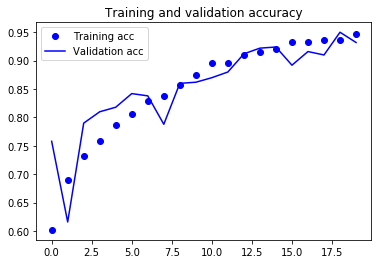

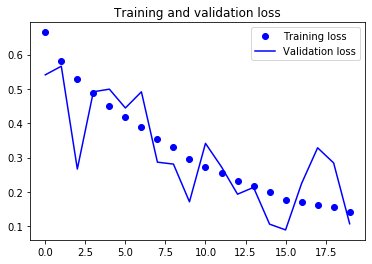

In [29]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
##Model 2 - Data Augmentation in Deep Learning

In [43]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
      shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

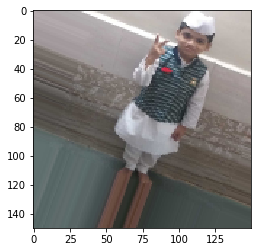

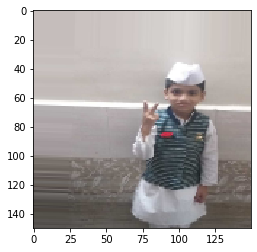

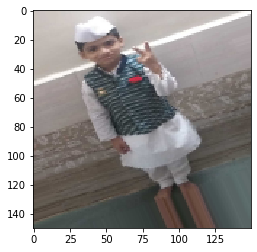

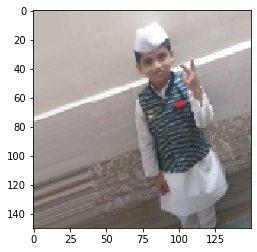

In [44]:
# This is module with the image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_son_dir, fname) for fname in os.listdir(train_son_dir)]

# We pick one image to "augment"
img_path = fnames[2]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [45]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [46]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/50
100/100 [==============================] - 313s 3s/step - loss: 0.6816 - acc: 0.5631 - val_loss: 0.6407 - val_acc: 0.7340
Epoch 2/50
100/100 [==============================] - 282s 3s/step - loss: 0.6316 - acc: 0.6503 - val_loss: 0.4935 - val_acc: 0.8056
Epoch 3/50
100/100 [==============================] - 275s 3s/step - loss: 0.5972 - acc: 0.6705 - val_loss: 0.4905 - val_acc: 0.6918
Epoch 4/50
100/100 [==============================] - 263s 3s/step - loss: 0.5905 - acc: 0.6780 - val_loss: 0.4583 - val_acc: 0.8427
Epoch 5/50
100/100 [==============================] - 267s 3s/step - loss: 0.5668 - acc: 0.6938 - val_loss: 0.3769 - val_acc: 0.7577
Epoch 6/50
100/100 [==============================] - 280s 3s/step - loss: 0.5588 - acc: 0.7063 - val_loss: 0.4874 - val_acc: 0.8152
Epoch 7/50
100/100 [==============================] - 272s 3s/step - loss: 0.5328 - acc: 0.7151 - val_loss: 0.4285 - va

In [48]:
model.save('son_and_notson_model_2.h5')

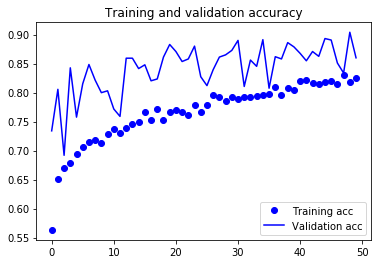

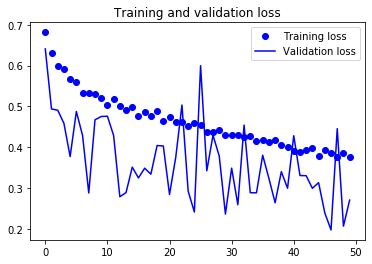

In [49]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#generator= train_datagen.flow_from_directory("train_dir", batch_size=batch_size)
#label_map = (generator.class_indices)

In [ ]:
## Model 3 - Dat Augmentaion Technique - Increased Epochs till 80 ... for more accuracy

In [45]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
      shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

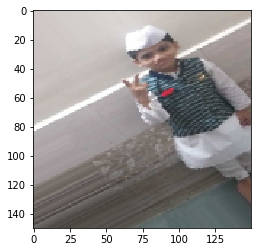

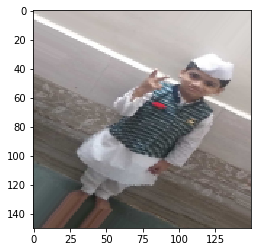

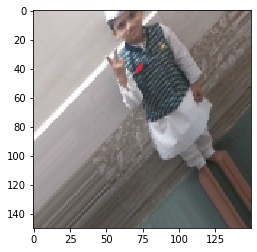

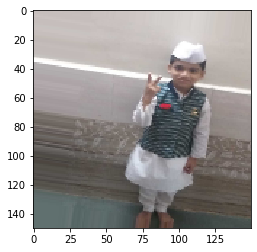

In [47]:
import matplotlib.pyplot as plt
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_son_dir, fname) for fname in os.listdir(train_son_dir)]

# We pick one image to "augment"
img_path = fnames[2]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [49]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

#Image Truncation
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=80,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/80
100/100 [==============================] - 602s 6s/step - loss: 0.6681 - acc: 0.6007 - val_loss: 0.5719 - val_acc: 0.7922
Epoch 2/80
100/100 [==============================] - 543s 5s/step - loss: 0.6229 - acc: 0.6617 - val_loss: 0.4709 - val_acc: 0.8529
Epoch 3/80
100/100 [==============================] - 547s 5s/step - loss: 0.5968 - acc: 0.6815 - val_loss: 0.4341 - val_acc: 0.7705
Epoch 4/80
100/100 [==============================] - 775s 8s/step - loss: 0.5794 - acc: 0.6913 - val_loss: 0.4550 - val_acc: 0.8331
Epoch 5/80
100/100 [==============================] - 563s 6s/step - loss: 0.5612 - acc: 0.7063 - val_loss: 0.4631 - val_acc: 0.8676
Epoch 6/80
100/100 [==============================] - 372s 4s/step - loss: 0.5511 - acc: 0.7083 - val_loss: 0.3342 - val_acc: 0.8491
Epoch 7/80
100/100 [==============================] - 304s 3s/step - loss: 0.5512 - acc: 0.7054 - val_loss: 0.4190 - va

In [50]:
model.save('son_and_notson_model_3.h5')

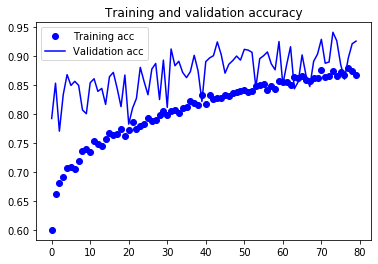

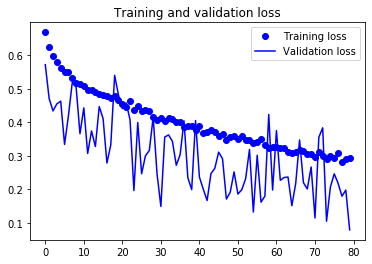

In [51]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
##

In [50]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 2000 images belonging to 2 classes.


In [51]:
label_map = (train_generator.class_indices)

In [52]:
print(label_map)

{'notson': 0, 'son': 1}
